In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
# Load data
calories_hour_file = '/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv'
sleep_file = '/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv'
calories_minute_file = '/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv'

hourly_calories_data = pd.read_csv(calories_hour_file)
minute_sleep_data = pd.read_csv(sleep_file)
minute_calories_data = pd.read_csv(calories_minute_file)
minute_calories_data.head(10)

,Id,ActivityMinute,Calories
0,1503960366,12:00:00 AM,0.7973
1,1503960366,12:01:00 AM,0.7973
2,1503960366,12:02:00 AM,0.7973
3,1503960366,12:03:00 AM,0.7973
4,1503960366,12:04:00 AM,0.7973
5,1503960366,12:05:00 AM,0.7973
6,1503960366,12:06:00 AM,0.7973
7,1503960366,12:07:00 AM,0.7973
8,1503960366,12:08:00 AM,0.7973
9,1503960366,12:09:00 AM,0.7973


In [3]:
minute_sleep_data.head(10)

,Id,date,value,logId
0,1503960366,2:39:30 AM,1,11114919637
1,1503960366,2:40:30 AM,1,11114919637
2,1503960366,2:41:30 AM,1,11114919637
3,1503960366,2:42:30 AM,1,11114919637
4,1503960366,2:43:30 AM,1,11114919637
5,1503960366,2:44:30 AM,1,11114919637
6,1503960366,2:45:30 AM,2,11114919637
7,1503960366,2:46:30 AM,2,11114919637
8,1503960366,2:47:30 AM,1,11114919637
9,1503960366,2:48:30 AM,1,11114919637


In [4]:
# Convert timestamps to datetime format
minute_sleep_data['date'] = pd.to_datetime(minute_sleep_data['date'])
minute_calories_data['ActivityMinute'] = pd.to_datetime(minute_calories_data['ActivityMinute'])

/var/folders/w6/vkcmr8l91_12vz93c0c46mtm0000gn/T/ipykernel_3142/120674362.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minute_sleep_data['date'] = pd.to_datetime(minute_sleep_data['date'])
/var/folders/w6/vkcmr8l91_12vz93c0c46mtm0000gn/T/ipykernel_3142/120674362.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minute_calories_data['ActivityMinute'] = pd.to_datetime(minute_calories_data['ActivityMinute'])


In [5]:
#We want to extract date only- (without time) for aggregation purposes
minute_sleep_data['date_only'] = minute_sleep_data['date'].dt.date
minute_calories_data['date_only'] = minute_calories_data['ActivityMinute'].dt.date

In [6]:
# Aggregate sleep data to calculate total sleep duration per day for each user
daily_sleep_data = minute_sleep_data.groupby(['Id', 'date_only'])['value'].sum().reset_index()
daily_sleep_data.rename(columns={'value': 'TotalSleepDuration'}, inplace=True)

In [7]:
# Aggregate calories data to calculate total calories burned per day for each user
daily_calories_data = minute_calories_data.groupby(['Id', 'date_only'])['Calories'].sum().reset_index()
daily_calories_data.rename(columns={'Calories': 'TotalCaloriesBurned'}, inplace=True)

In [8]:
# Merge the aggregated sleep and calories data on Id and date
merged_daily_data = pd.merge(daily_sleep_data, daily_calories_data, on=['Id', 'date_only'], how='inner')

# Display the first few rows of the merged dataset to verify the structure
print(merged_daily_data.head())

           Id   date_only  TotalSleepDuration  TotalCaloriesBurned
0  1503960366  2024-11-30               10459         60345.520855
1  1644430081  2024-11-30                2520         88776.595896
2  1844505072  2024-11-30                2546         47186.415576
3  1927972279  2024-11-30               12102         82597.678298
4  2022484408  2024-11-30                 153         82279.337922


In [9]:
# Save the merged dataset for further analysis
merged_daily_data.to_csv('merged_daily_sleep_calories.csv', index=False)

In [10]:
# Load the merged daily sleep and calories dataset
merged_daily_data = pd.read_csv('merged_daily_sleep_calories.csv')


In [11]:
# Define independent and dependent variables
X = merged_daily_data[['TotalSleepDuration (Seconds)']]
y = merged_daily_data['TotalCaloriesBurned']

KeyError: "None of [Index(['TotalSleepDuration (Seconds)'], dtype='object')] are in the [columns]"

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
# Display the regression model results
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Model Coefficients:
Intercept: 65404.69798139761, Coefficient: -0.04188559898076013
Mean Squared Error: 315597955.7619316
R² Score: -0.05200320789520618


In [ ]:
# Analyze individual user regression results
user_results = []

for user_id in merged_daily_data['Id'].unique():
    user_data = merged_daily_data[merged_daily_data['Id'] == user_id]
    print(f"User ID: {user_id}, Number of Records: {len(user_data)}")
    
    if len(user_data) > 1:  # Ensure enough data points for regression
        X_user = user_data[['TotalSleepDuration']]
        y_user = user_data['TotalCaloriesBurned']
        
        # Fit a linear regression model for the individual user
        user_model = LinearRegression()
        user_model.fit(X_user, y_user)

        user_r2 = user_model.score(X_user, y_user)
        user_results.append({
            'Id': user_id, 
            'Intercept': user_model.intercept_, 
            'Coefficient': user_model.coef_[0], 
            'R² Score': user_r2
        })


User ID: 1503960366, Number of Records: 1
User ID: 1644430081, Number of Records: 1
User ID: 1844505072, Number of Records: 1
User ID: 1927972279, Number of Records: 1
User ID: 2022484408, Number of Records: 1
User ID: 2026352035, Number of Records: 1
User ID: 2347167796, Number of Records: 1
User ID: 3977333714, Number of Records: 1
User ID: 4020332650, Number of Records: 1
User ID: 4319703577, Number of Records: 1
User ID: 4445114986, Number of Records: 1
User ID: 4558609924, Number of Records: 1
User ID: 4702921684, Number of Records: 1
User ID: 5553957443, Number of Records: 1
User ID: 5577150313, Number of Records: 1
User ID: 6117666160, Number of Records: 1
User ID: 6775888955, Number of Records: 1
User ID: 6962181067, Number of Records: 1


In [ ]:
# Convert user results to a DataFrame
user_results_df = pd.DataFrame(user_results)

# Check if the DataFrame is empty
if user_results_df.empty:
    print("No sufficient data available to fit regression models for individual users.")
else:
    print("\nIndividual User Regression Results:")
    print(user_results_df)

    # Save the individual user regression results to a CSV file for further analysis
    user_results_df.to_csv('individual_user_regression_results.csv', index=False)

No sufficient data available to fit regression models for individual users.


In addition to the basic regression analysis we want to test for additional metrics to identify further relationship features between the two variables: 

P-Values - Determines if the relationship between sleep duration and calories burned is statistically significant. Helps confirm if there’s a significant relationship between Sleep Duration and Calories Burned.

Confidence Intervals - Provides the range within which the coefficient is expected to lie, offering insight into the precision of the estimate. A narrow confidence interval reinforces the reliability of the coefficient.

Residual Analysis- Checks model appropriateness (e.g., randomness of residuals). Examines the difference between actual and predicted values to detect patterns (e.g., non-linearity or heteroscedasticity).

Adjusted R²	Evaluates model performance when adding additional predictors. It accounts for the number of predictors in the model. Unlike R², it doesn’t artificially increase when additional predictors are added.

RMSE and MAE - Provides error metrics in interpretable units for prediction performance. This allows us to learn and evaluate how well your model generalizes beyond the training data:

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [ ]:
# Overall regression analysis results
print("Overall Model Coefficients:")
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Overall Model Coefficients:
Intercept: 65404.69798139761, Coefficient: -0.04188559898076013
Mean Squared Error: 315597955.7619316
R² Score: -0.05200320789520618


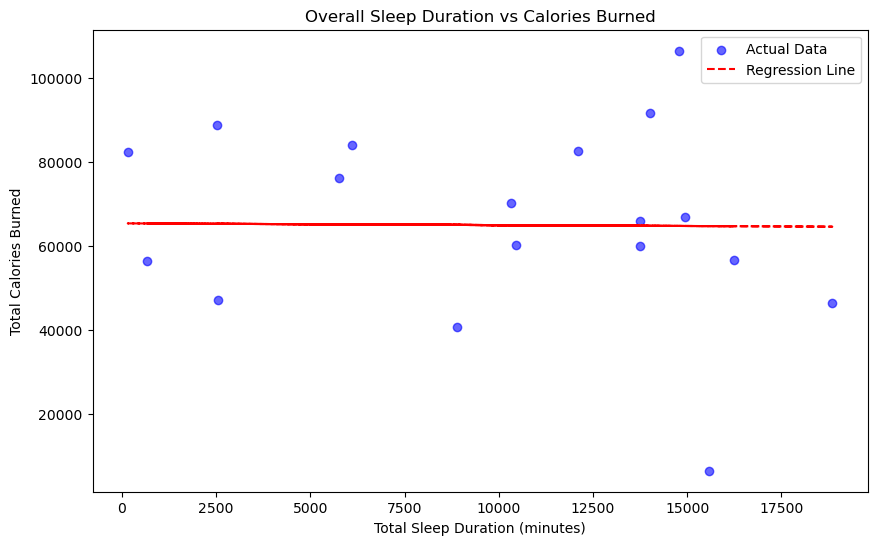

In [ ]:
# Visualization for the overall regression analysis results

# Scatter plot for overall data with regression line
plt.figure(figsize=(10, 6))

# Scatter plot of sleep duration vs calories burned for the overall dataset
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')

# Plotting the regression line using the model predictions
y_pred_overall = model.predict(X)
plt.plot(X, y_pred_overall, color='red', linestyle='--', label='Regression Line')

# Titles and labels
plt.title('Overall Sleep Duration vs Calories Burned')
plt.xlabel('Total Sleep Duration (minutes)')
plt.ylabel('Total Calories Burned')
plt.legend()

# Show plot
plt.show()